# FOOD STYLES - TECHNICAL CHALLENGE 
## Ezgi Tunalı

##### importing libraries and dataset

In [1]:
### answer ###
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
df = pd.read_csv('dataset.csv', low_memory=False) 
df.head(5)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.0,36.0,English,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.0,5.0,All languages,5.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.0,13.0,English,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,NaN,NaN,NaN,4.0,34.0,English,1.0,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.5,11.0,All languages,11.0,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [5]:
df.shape

(1083397, 42)

## DATA CLEANING

#### Identify the columns with mixed data types.

In [6]:
i = 0
for col in df.columns:
    mixed_columns = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[mixed_columns]) > 0:
        i = i+1
        print(col)
        
print('\n There are ', i, ' mixed columns in the dataset and ', len(df[mixed_columns]) , ' of the instances have values of mixed columns')

region
province
city
claimed
awards
popularity_detailed
popularity_generic
top_tags
price_level
price_range
meals
cuisines
special_diets
features
original_open_hours
default_language
keywords

 There are  17  mixed columns in the dataset and  99198  of the instances have values of mixed columns


#### For each column, count the number of rows per data type.

In [7]:
for col in df.columns:
    column_series = pd.Series(df[col])
    #print(df[col])
    print(column_series.map(type).value_counts())
    print("\n")

<class 'str'>    1083397
Name: restaurant_link, dtype: int64


<class 'str'>    1083397
Name: restaurant_name, dtype: int64


<class 'str'>    1083397
Name: original_location, dtype: int64


<class 'str'>    1083397
Name: country, dtype: int64


<class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64


<class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64


<class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64


<class 'str'>    1083397
Name: address, dtype: int64


<class 'float'>    1083397
Name: latitude, dtype: int64


<class 'float'>    1083397
Name: longitude, dtype: int64


<class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64


<class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64


<class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64


<class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, 

#### Would removing missing values solve the mixed data type problem?

In [8]:
#df.isnull().sum()

In [9]:
df = df.dropna(axis = 0)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

restaurant_link                      0
restaurant_name                      0
original_location                    0
country                              0
region                               0
province                             0
city                                 0
address                              0
latitude                             0
longitude                            0
claimed                              0
awards                               0
popularity_detailed                  0
popularity_generic                   0
top_tags                             0
price_level                          0
price_range                          0
meals                                0
cuisines                             0
special_diets                        0
features                             0
vegetarian_friendly                  0
vegan_options                        0
gluten_free                          0
original_open_hours                  0
open_days_per_week       

In [10]:
i = 0
for col in df.columns:
    mixed_columns = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[mixed_columns]) > 0:
        i = i+1
        print(col)
        
print('\n There are ', i, ' mixed columns in the dataset and ', len(df[mixed_columns]) , ' of the instances have values of mixed columns')


 There are  0  mixed columns in the dataset and  0  of the instances have values of mixed columns


##### --> Removing null values solved the mixed datatype problem 

In [11]:
duplicate = df.duplicated()
df[duplicate] 
#there is no duplicates

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords


## DATA UNDERSTANDING

#### Are the review columns correlated with the rating columns?

In [12]:
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
df_review = df[review_columns]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]
df_rating = df[rating_columns]
correlation_check = review_columns + rating_columns

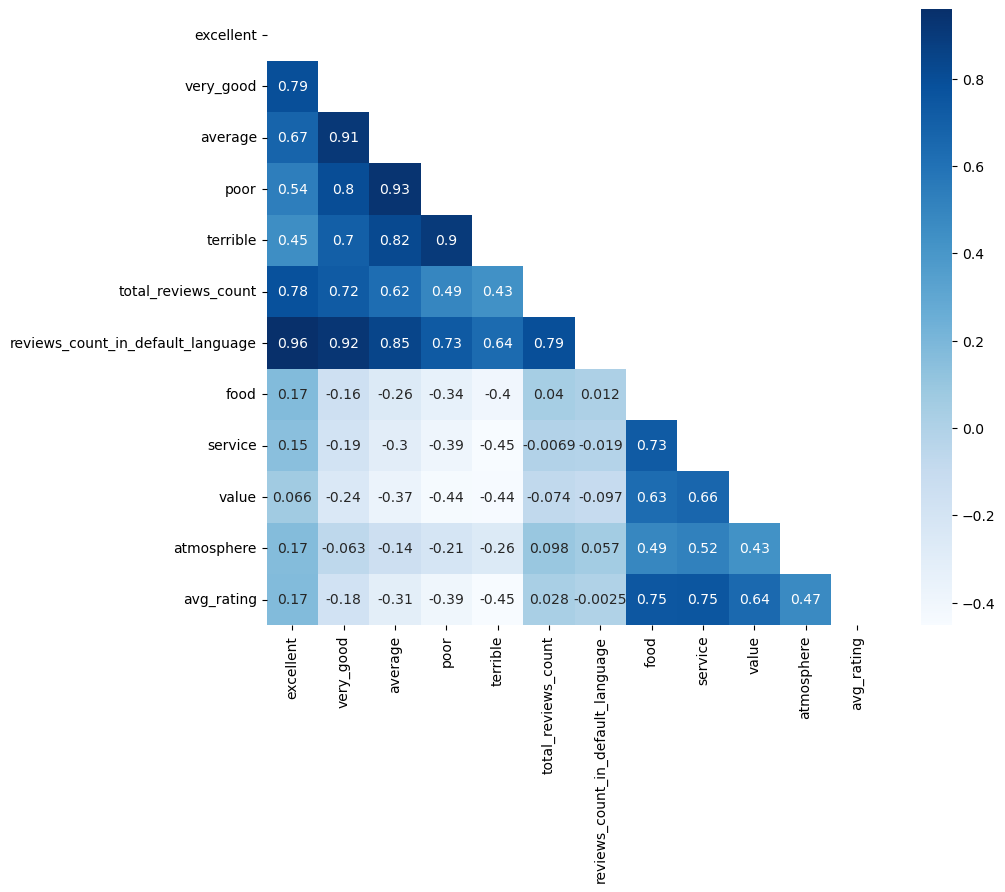

In [13]:
from matplotlib import cm
fig = plt.figure(figsize =(10, 8))
mp.rcParams.update({'font.size': 10})
mask = np.triu(df[correlation_check].corr())
sb.heatmap(df[correlation_check].corr(), cmap='Blues', annot=True, fmt='.2g',square =True, mask=mask);

- terrible reviews are the most correlated with avg_rating <p>
- negative reviews (poor, terrible) in general have relatively higher correlation with avg_rating than positive reviews (excellent, very good) <p>
- value is the main reason for the negative reviews (poor, terrible) while there is no significant or even moderate reason for positive reviews (excellent, very good)
- food and service are the main determinants of average rating
- positive reviews are relatively more likely to be given (reviews_count)

#### Are vegetarian-friendly restaurants better than non-vegetarian ones?

In [14]:
from scipy import stats
from scipy.stats import spearmanr

#Testing normality to choose statistical tests

#H₀: data is normally distributed
#H₁: data is not normally distributed

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    if p_value_normality <0.05:
        print("p value:", p_value_normality, "--> The data is not normally distributed")
    else:
        print("p value:", p_value_normality, "--> The data is normally distributed") 

In [15]:
# better in terms of "avg_rating"

#df.groupby('vegetarian_friendly')['vegetarian_friendly'].count()
veg_ratings = df[["avg_rating"]].loc[df["vegetarian_friendly"] == 'Y'].values
non_veg_ratings = df[["avg_rating"]].loc[df["vegetarian_friendly"] == 'N'].values
veg_ratings = sorted(veg_ratings)
non_veg_ratings = sorted(non_veg_ratings)

In [16]:
#H₀: there is no statistically significant difference between mean distributions
#H₁: there is statistically significant difference between mean distributions

#unpaired datasets, same distribution we can use mann-whitney test

ttest,pvalue = stats.mannwhitneyu(veg_ratings, non_veg_ratings, alternative="two-sided")
#ttest,pvalue = stats.mannwhitneyu(standardized_friends_likes,standardized_himym_likes, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - ratings of vegetarian-nonvegetarian are not significantly different")
    
#the probability of getting a sufficiently low value of the test statistic by chance under the null hypothesis is greater than 5%, so we do not reject the null hypothesis in favor of our alternative.

p-value:0.4159
Fail to reject null hypothesis - ratings of vegetarian-nonvegetarian are not significantly different


--> vegetarian_friendly restaurants are not significantly better then others

#### Are there any significantly more expensive cuisines?

In [17]:
cuisine_words = []

for i in range(len(df)): 
    a = ("".join(df.iloc[i]['cuisines']))
    cuisine_words.append(a)
#cuisine_words

In [18]:
b = ",".join(cuisine_words).replace(",", " ").split(" ")
res2 = list(np.unique(b))

#eliminating general words to come up with the cuisine terms only

res2 = [e for e in res2 if e not in ('', '&', 'Wine', 'bar', 'bars', 'food', 'restaurants', 'Beer', 'Barbecue', 'Beer', 'Brew', 'Cafe', 'Cajun', 'Fast', 'Food', 'Fusion', 'Gastropub', 'Grill', 'Healthy', 'International', 'Sushi', 'Street', 'Steakhouse', 'South', 'Soups', 'Seafood', 'Pub', 'Pizza', 'New', 'Middle', 'Diner', 'Dining', 'Deli', 'Contemporary', 'Central', 'Bar')]
##res2

In [19]:
df["main_cuisine"] = ''

#creating a new column and passing the main_cuisine values

for j in range(len(df)):
    for i in range(len(res2)):

        if str(res2[i]) in (str(df.iloc[j]['cuisines']).split(', ')):

            if (df.iloc[j]['main_cuisine']) is not '':
                current = df['main_cuisine'][j]
                df['main_cuisine'][j] = current + ', ' + res2[i]
            else:
                df['main_cuisine'][j] = res2[i]


In [20]:
df[['cuisines', 'main_cuisine', 'price_level', 'price_range','keywords']].head(10)

,cuisines,main_cuisine,price_level,price_range,keywords
0,"Bar, British, Pub",British,€,€3-€8,"chicken curry, mont saint michel, kevin, beer,..."
1,"French, European","European, French",€€€€,€75-€130,"tasting menu, in advance, star restaurant, won..."
2,"French, Mediterranean, European","European, French, Mediterranean",€€€€,€30-€44,"parfait, lamb, birthday lunch, superb location..."
3,"Indian, Pakistani","Indian, Pakistani",€€-€€€,€12-€18,"bhindi, butter chicken, curries, vindaloo, naan"
4,French,French,€€-€€€,€19-€50,"scallops, nougat, mash, guinea fowl, gazpacho"
5,"French, Bar, European","European, French",€€-€€€,€20-€70,"meatballs, burger, salad, duck, potatoes"
6,"French, Contemporary",French,€€€€,€38-€100,"scallops, lemon tart, mise en bouche, course m..."
7,"French, European, Healthy","European, French",€€-€€€,€9-€23,"lamb chops, great dinner, wines, vineyard, bistro"
8,"French, European, Healthy, Contemporary","European, French",€€€€,€35-€120,"prawns, risotto, pork, between courses, set menu"
9,"French, Mediterranean, European, Healthy","European, French, Mediterranean",€€-€€€,€9-€27,"salad, cassoulet, steak, old city, within the ..."


In [21]:
df['price_range_avg'] = df['price_range']

for i in range(len(df)):
    df['price_range_avg'][i] = str(df['price_range_avg'][i]).replace('€','').replace('CHF', '').replace(',','')

#at this time €/CHF currency rate is almost 1

df[['price_range', 'price_range_avg', 'price_level']].head()

,price_range,price_range_avg,price_level
0,€3-€8,3-8,€
1,€75-€130,75-130,€€€€
2,€30-€44,30-44,€€€€
3,€12-€18,12-18,€€-€€€
4,€19-€50,19-50,€€-€€€


In [22]:
#taking range averages after string manipulation

df['price_range_avg'] = df['price_range_avg'].str.split('-').apply(lambda x : (float(x[0])+float(x[1]))/2)
df[['price_range', 'price_range_avg', 'price_level']].head()

,price_range,price_range_avg,price_level
0,€3-€8,5.5,€
1,€75-€130,102.5,€€€€
2,€30-€44,37.0,€€€€
3,€12-€18,15.0,€€-€€€
4,€19-€50,34.5,€€-€€€


In [23]:
#checking the number of distinct price ranges to eliminate if there is so little info 

cuisine_price_count = (df.groupby('main_cuisine')['price_range_avg'].count()).to_dict()
#cuisine_price_count
df['range_count']  = df['main_cuisine'].map(cuisine_price_count)
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,main_cuisine,price_range_avg,range_count
0,g1024186-d6839181,The Oystercatcher,"[""Europe"", ""France"", ""Brittany"", ""Ille-et-Vila...",France,Brittany,Ille-et-Vilaine,Saint Marcan,"7 le Bourg, 35120 Saint Marcan France",48.588000,-1.634103,Claimed,"Certificate of Excellence 2019, Certificate of...",#1 of 1 Restaurant in Saint Marcan,#1 of 1 places to eat in Saint Marcan,"Cheap Eats, Bar, British, Pub",€,€3-€8,Dinner,"Bar, British, Pub",Vegetarian Friendly,"Reservations, Outdoor Seating, Seating, Free o...",Y,N,N,"{""Mon"": [""17:00-20:30""], ""Tue"": [""17:00-20:30""...",6.0,21.0,6.0,5.0,115.0,English,76.0,67.0,8.0,0.0,1.0,0.0,4.5,5.0,5.0,5.0,"chicken curry, mont saint michel, kevin, beer,...",British,5.5,606
1,g1055403-d1059472,La Grand’Vigne,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Gi...",France,Nouvelle-Aquitaine,Gironde,Martillac,Chemin de Smith Haut-Lafitte Les Sources de Ca...,44.730804,-0.557221,Claimed,"Travellers' Choice, Michelin 2021 for Two Mich...",#1 of 7 Restaurants in Martillac,#1 of 8 places to eat in Martillac,"Fine Dining, French, European, Vegetarian Frie...",€€€€,€75-€130,"Lunch, Dinner","French, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Reservations, Outdoor Seating, Private Dining,...",Y,Y,Y,"{""Mon"": [], ""Tue"": [], ""Wed"": [""19:00-22:00""],...",5.0,19.0,7.0,4.5,494.0,English,121.0,84.0,23.0,8.0,4.0,2.0,4.5,4.5,4.0,4.5,"tasting menu, in advance, star restaurant, won...","European, French",102.5,40
2,g1310615-d1776484,L'Auberge du Vieux Château,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Az...",France,Provence-Alpes-Cote d'Azur,French Riviera - Cote d'Azur,Cabris,"Place Mirabeau, 06530 Cabris, Grasse France",43.655304,6.876172,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 7 Restaurants in Cabris,#1 of 10 places to eat in Cabris,"Fine Dining, French, Mediterranean, European",€€€€,€30-€44,"Lunch, Dinner","French, Mediterranean, European","Vegetarian Friendly, Vegan Options","Seating, Parking Available, Street Parking, Va...",Y,Y,N,"{""Mon"": [], ""Tue"": [""07:30-15:00"", ""19:00-23:0...",6.0,77.0,8.0,4.5,660.0,English,140.0,108.0,22.0,8.0,2.0,0.0,4.5,4.5,4.5,4.5,"parfait, lamb, birthday lunch, superb location...","European, French, Mediterranean",37.0,20
3,g1378922-d943851,Rajpoute,"[""Europe"", ""France"", ""Auvergne-Rhone-Alpes"", ""...",France,Auvergne-Rhone-Alpes,Ain,Ornex,"1553 rue de Geneve, 01210 Ornex France",46.263890,6.102778,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 5 Restaurants in Ornex,#1 of 5 places to eat in Ornex,"Mid-range, Indian, Pakistani, Vegetarian Friendly",€€-€€€,€12-€18,"Lunch, Dinner, After-hours","Indian, Pakistani","Vegetarian Friendly, Vegan Options, Gluten Fre...","Takeout, Reservations, Outdoor Seating, Seatin...",Y,Y,Y,"{""Mon"": [""19:00-23:30""], ""Tue"": [""12:00-14:30""...",7.0,48.0,13.0,4.5,563.0,English,182.0,97.0,52.0,15.0,8.0,10.0,4.5,4.5,4.0,4.0,"bhindi, butter chicken, curries, vindaloo, naan","Indian, Pakistani",15.0,2
4,g1456920-d2268495,Le Moulin de Varen,"[""Europe"", ""France"", ""Occitanie"", ""Tarn-et-Gar...",France,Occitanie,Tarn-et-Garonne,Varen,"Le bourg Le Bourg, 82330 Varen, Saint-Antonin ...",44.164474,1.900635,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 2 Restaurants in Varen,#1 of 3 places to eat in Varen,"Mid-range, French, Vegetarian Friendly, Vegan ...",€€-€€€,€19-€50,"Lunch, Dinner, Drinks",French,"Vegetarian Friendly, Ve

In [24]:
#PRICE_RANGE_AVG for all main_cuisines

price_range_comparison = df[['main_cuisine', 'price_range_avg', 'range_count']].groupby('main_cuisine').mean().sort_values(by=['price_range_avg'], ascending = False).reset_index()
price_range_comparison.columns = ['main_cuisine', 'price_range_avg', 'range_count']
price_range_comparison

,main_cuisine,price_range_avg,range_count
0,"Danish, French",394.500000,1.0
1,Argentinian,263.000000,2.0
2,"French, Mediterranean",77.000000,4.0
3,"British, European, French, Scottish",58.000000,1.0
4,"British, European, Mediterranean, Spanish",56.000000,1.0
5,"European, French, Mediterranean, Spanish",54.000000,1.0
6,Japanese,50.000000,1.0
7,"European, French, Italian",46.500000,2.0
8,"Danish, European, French, Scandinavian",45.500000,1.0
9,"Danish, European, Scandinavian",40.000000,1.0


The above table implies there are outliers which would corrupt the comparison. So, an elimination according to the number of price_range values will be carried <p>
--> which, increases statistical confidence, handles outliers and make comparisons, visuals more understandable



In [191]:
#visualizing a random outlier case
df[['price_level','price_range','price_range_avg']].loc[df['main_cuisine'] == 'Argentinian'] 

,price_level,price_range,price_range_avg
150,€€-€€€,€10-€999,504.5
622,€€-€€€,€3-€40,21.5


In [25]:
#price_range_comp_elim = price_range_comparison.loc[price_range_comparison["main_cuisine"] != 'Argentinian']
price_range_comp_elim = price_range_comparison.loc[price_range_comparison["range_count"] >= 10]
#price_range_comp_elim.shape

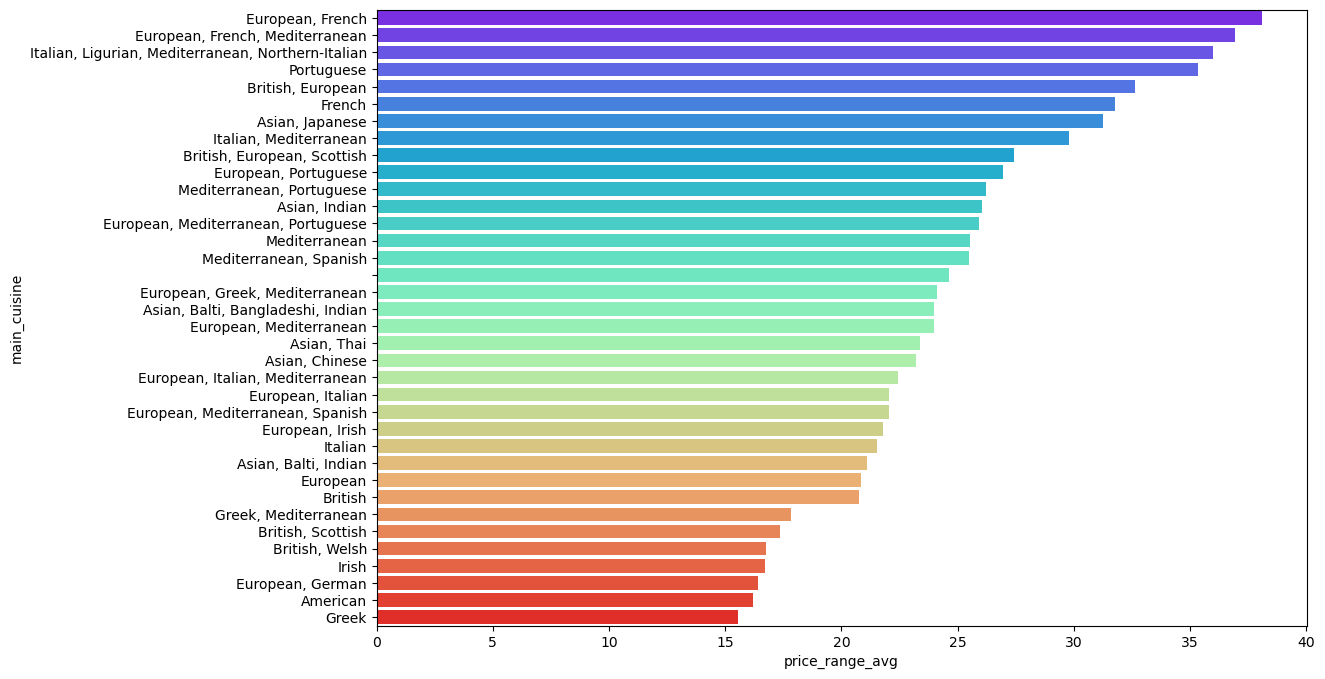

In [26]:
plt.figure(figsize=(12,8))
a = sb.barplot(x = 'price_range_avg', y = 'main_cuisine', data = price_range_comp_elim, palette='rainbow')
plt.show()

According to the graph, French cuisine has significantly higher prices.

Using price_level could be more unbiased due to location-wise price and currency discrimination

In [27]:
# columns cuisines, price_level
#df['price_range'].value_counts()
#df['cuisines'].value_counts()
df['price_level'].value_counts()

€€-€€€    1950
€€€€       127
€          100
Name: price_level, dtype: int64

In [28]:
df['price_level_ordinal'] = df['price_level']
df['price_level_ordinal'].replace(['€','€€-€€€','€€€€'], [0,1,2], inplace=True)

In [29]:
price_level_comp = df.loc[df["range_count"] >= 10]
price_level_comp_list = price_level_comp[['main_cuisine', 'price_level_ordinal']].groupby('main_cuisine').agg({'price_level_ordinal':lambda x: list(x)}).reset_index()
price_level_comp_list.columns = ['main_cuisine', 'price_level_ordinal']

price_level_comp_list

,main_cuisine,price_level_ordinal
0,,"[2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,American,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,"Asian, Balti, Bangladeshi, Indian","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"Asian, Balti, Indian","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"Asian, Chinese","[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5,"Asian, Indian","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]"
6,"Asian, Japanese","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]"
7,"Asian, Thai","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
8,British,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ..."
9,"British, European","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, ..."


In [30]:
price_level_comp[['main_cuisine', 'price_level_ordinal']].groupby('main_cuisine').mean().sort_values(by=['price_level_ordinal'], ascending = False)

,price_level_ordinal
main_cuisine,
"European, French, Mediterranean",1.350000
"European, French",1.325000
"British, European, Scottish",1.210526
Portuguese,1.200000
Mediterranean,1.200000
"European, Mediterranean",1.200000
"British, European",1.187500
French,1.125000
"Italian, Ligurian, Mediterranean, Northern-Italian",1.100000


In addition to price_range_averages, price_level comparison also implies that French cuisine has higher prices.

In [31]:
#kruskal wallis

result = stats.kruskal(*price_level_comp_list['price_level_ordinal'])
print(result)

KruskalResult(statistic=164.9300648994608, pvalue=9.269651892011944e-19)


There any significantly more expensive cuisines according to the p-value which is much lower than the confidence level 0.05

## BUSINESS-SPECIFIC

#### 1. Top 5 capitals to open gluten-free restaurants ?

In [32]:
eu_area = pd.read_csv('europe_capitals_population_and_area.csv', low_memory=False, sep=';') 
eu_area

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"
5,6,Brussels,Belgium,1191604,"161,38"
6,7,Budapest,Hungary,1779361,"525,2"
7,8,Copenhagen,Denmark,602481,"88,25"
8,9,Dublin,Ireland,527612,115
9,10,Edinburgh,Scotland,482005,264


In [33]:
gluten_frees = df[['avg_rating','country', 'city', 'restaurant_link', 'popularity_detailed','popularity_generic','gluten_free', 'total_reviews_count']]
gluten_frees = gluten_frees.loc[gluten_frees["gluten_free"] == 'Y']
#gluten_frees.shape

In [34]:
gluten_frees.head()

,avg_rating,country,city,restaurant_link,popularity_detailed,popularity_generic,gluten_free,total_reviews_count
1,4.5,France,Martillac,g1055403-d1059472,#1 of 7 Restaurants in Martillac,#1 of 8 places to eat in Martillac,Y,494.0
3,4.5,France,Ornex,g1378922-d943851,#1 of 5 Restaurants in Ornex,#1 of 5 places to eat in Ornex,Y,563.0
4,4.5,France,Varen,g1456920-d2268495,#1 of 2 Restaurants in Varen,#1 of 3 places to eat in Varen,Y,315.0
12,4.5,France,Nimes,g187154-d3647319,#14 of 452 Restaurants in Nimes,#14 of 527 places to eat in Nimes,Y,732.0
14,4.0,France,Bayeux,g187181-d1056070,#17 of 78 Restaurants in Bayeux,#18 of 85 places to eat in Bayeux,Y,1315.0


In [35]:
gluten_free_rests = (gluten_frees.groupby('city')['restaurant_link'].count()).to_dict()
#cuisine_price_count
gluten_frees['gluten_free_count']  = gluten_frees['city'].map(gluten_free_rests)
gluten_frees.head()

,avg_rating,country,city,restaurant_link,popularity_detailed,popularity_generic,gluten_free,total_reviews_count,gluten_free_count
1,4.5,France,Martillac,g1055403-d1059472,#1 of 7 Restaurants in Martillac,#1 of 8 places to eat in Martillac,Y,494.0,1
3,4.5,France,Ornex,g1378922-d943851,#1 of 5 Restaurants in Ornex,#1 of 5 places to eat in Ornex,Y,563.0,1
4,4.5,France,Varen,g1456920-d2268495,#1 of 2 Restaurants in Varen,#1 of 3 places to eat in Varen,Y,315.0,1
12,4.5,France,Nimes,g187154-d3647319,#14 of 452 Restaurants in Nimes,#14 of 527 places to eat in Nimes,Y,732.0,1
14,4.0,France,Bayeux,g187181-d1056070,#17 of 78 Restaurants in Bayeux,#18 of 85 places to eat in Bayeux,Y,1315.0,2


In [36]:
gluten_frees['city'].value_counts()[:20]

Dublin                60
Lisbon                34
Leeds                 34
Brighton              27
York                  26
Funchal               23
Sheffield             22
Puerto Del Carmen     16
Windsor               16
Cork                  14
Norwich               13
Galway                12
Harrogate             12
Bury St Edmunds       10
Albufeira             10
Lagos                 10
Kingston-upon-Hull     9
Rhodes Town            9
Torquay                9
Rethymnon              9
Name: city, dtype: int64

In [37]:
#Which capitals have a gluten-free restaurant already ? 
gluten_frees_capital = gluten_frees.loc[gluten_frees['city'].isin(eu_area['City'])] 
#gluten_frees_capital.head() 
gluten_frees_capital['city'].value_counts().to_dict()

{'Dublin': 60, 'Lisbon': 34, 'Munich': 6}

In [38]:
eu_area['gluten_free_count'] = 0
ind_eu_glut = eu_area.loc[eu_area['City'].isin(gluten_frees['city'])].index

glut_free_rest = [60,34,6]
j = 0 
for i in ind_eu_glut:
    #print(i)
    eu_area['gluten_free_count'][i] = glut_free_rest[j]
    j = j+1

eu_area.columns = ['CityNo', 'City', 'Country', 'Population', 'Area_in_km2', 'gluten_free_count']
eu_area

,CityNo,City,Country,Population,Area_in_km2,gluten_free_count
0,1,Amsterdam,Netherland,851573,"219,32",0
1,2,Athens,Greece,664046,2929,0
2,4,Barcelona,Spain,1620809,"101,4",0
3,4,Berlin,Germany,3711930,"891,7",0
4,5,Bratislava,Slovakia,424428,"367,6",0
5,6,Brussels,Belgium,1191604,"161,38",0
6,7,Budapest,Hungary,1779361,"525,2",0
7,8,Copenhagen,Denmark,602481,"88,25",0
8,9,Dublin,Ireland,527612,115,60
9,10,Edinburgh,Scotland,482005,264,0


In [39]:
eu_area['area'] = eu_area['Area_in_km2']
eu_area['area'] = eu_area['area'].str.replace(',','.')
eu_area['area'] = pd.to_numeric(eu_area['area'], errors='coerce')
#eu_area

In [40]:
eu_area['gluten_free_rest_density'] = (eu_area['gluten_free_count']) / (eu_area['area']).astype(float)
eu_area.sort_values(by=['gluten_free_rest_density','Population'], ascending = [True,False])[:5] 

,CityNo,City,Country,Population,Area_in_km2,gluten_free_count,area,gluten_free_rest_density
16,17,London,England,8825000,607,0,607.0,0.0
3,4,Berlin,Germany,3711930,"891,7",0,891.7,0.0
19,20,Madrid,Spain,3141991,"604,3",0,604.3,0.0
26,27,Rome,Italy,2868782,1285,0,1285.0,0.0
24,25,Paris,France,2206488,"105,4",0,105.4,0.0


Assuming there are no other factors except population and gluten-free restaurant density, <b> in London, Berlin, Madrid, Rome and Paris </b> there are no gluten free restaurants and the populations are the top 5.
So they can be chosen as candidates for opening new gluten_free restaurants. <p>
However, I would also considered the generic population of gluten_free restaurants for capital cities which already own any gluten free restaurants and suggest the underrated cities. I wrote another snippet to calculate the generic popularity percentiles and think that Munich would be a good choice as it has high population, low gluten-free restaurants density and already existing customer base.

#### 2. Other business-specific ideas

- Extending assumptions to include generic popularity percentiles, new restaurants could be opened in areas where there is already similar concept restaurans, customer demand, existing suppliers but low-performing restaurants.
- Opening restaurants offering vegan options in areas where there is no vegan restaurants but many vegetarian restaurants.
- Introducing specific cuisine with a unique value proposition where other restaurants of same cuisine are highly expensive
- Opening restaurants in the capital of countries where there are many restaurants of specific concept widely in various cities but none in capital city.

## BONUS

In [41]:
import json

In [42]:
paris = open('paris_bounding_polygon.json')
paris_data = json.load(paris)
paris_df = pd.DataFrame(paris_data)
#paris_data
#paris_df

In [43]:
#!pip3 install folium

In [44]:
italians = ['Campania', 'Central-Italian', 'Lazio', 'Neapolitan', 'Romana', 'Southern-Italian', 'Italian', 'Sicilian', 
'Ligurian', 'Northern-Italian', 'Mediterranean'] 

france_italian = df[['latitude', 'longitude', 'city', 'main_cuisine']].loc[df['country'] == 'France']

lat = []
long = []

for i in range(len(france_italian)):
    if any(ext in france_italian['main_cuisine'][i] for ext in italians):
        lat.append(france_italian['latitude'][i])
        long.append(france_italian['longitude'][i])   

#france_italian

In [45]:
france_italian_rests = pd.DataFrame(lat, long).reset_index()
france_italian_rests.columns = ['lat','long']
#france_italian_rests
france_rests = df[['latitude', 'longitude']].loc[df['country'] == 'France']
#france_rests

In [46]:
import folium

# Make an empty map
m = folium.Map(location=[47,3], tiles="OpenStreetMap", zoom_start=6)

for i in range(0,len(paris_df)):
   folium.Circle(
      location=[paris_df.iloc[i][1], paris_df.iloc[i][0]],
      #popup=paris_df.iloc[i]['name'],
      radius=0.5,#float(paris_df.iloc[i]['value'])*20000,
      color='red',
      fill=False,
      fill_color='red'
   ).add_to(m)


for i in range(0,len(france_rests)):
   folium.Circle(
      location=[france_rests.iloc[i][0], france_rests.iloc[i][1]],
      #popup=paris_df.iloc[i]['name'],
      radius=200,#float(paris_df.iloc[i]['value'])*20000,
      color='orange',
      fill=True,
      fill_color='orange'
   ).add_to(m)


for i in range(0,len(france_italian_rests)):
   folium.Circle(
      location=[france_italian_rests.iloc[i][1], france_italian_rests.iloc[i][0]],
      #popup=paris_df.iloc[i]['name'],
      radius=200,#float(paris_df.iloc[i]['value'])*20000,
      color='purple',
      fill=True,
      fill_color='purple'
   ).add_to(m)


m


According to the data and geographical representation, even if the restaurants with Mediterrean cuisine are considered as competitors, Italian restaurants (Mediterrean included) are spread in Italy border.
So the answer, could be simply opening the Italian restaurant in any coordinate in Paris, but tourist attraction landmarks worth considering more.